In [12]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
from quality_assess import evaluate

In [3]:
def show_image(image):
    plt.figure()
    plt.imshow(np.abs(image), cmap='gray')
    plt.show()

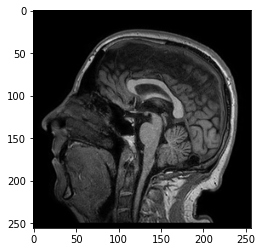

In [6]:
## Get the middle slice of image
sitk_t1 = sitk.ReadImage('t1.nii.gz') 
t1 = sitk.GetArrayFromImage(sitk_t1)
img = t1[1][0][45]

show_image(img)

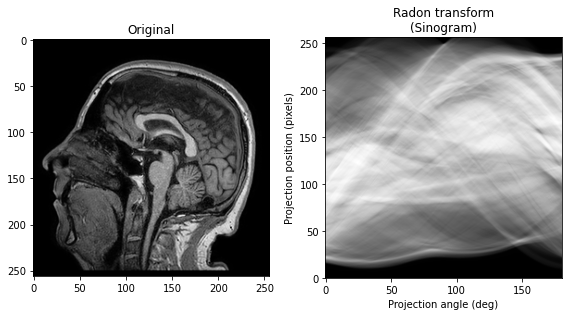

In [9]:
## Generate sinogram with radon transform
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(img.shape), endpoint=False)
sinogram = radon(img, theta=theta)

dx, dy = 0.5 * 180.0 / max(img.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")

ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

FBP rms reconstruction error: 87.1


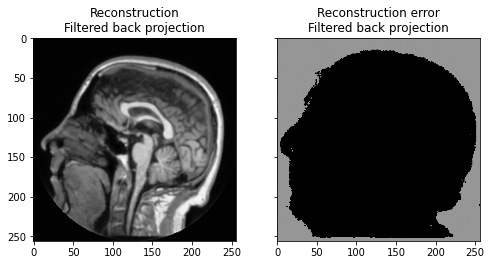

PSNR = 22.306288490543484
SSIM = 0.7105400771852608
MSE = 382.34156353711796
 


In [18]:
# FBP reconstruction
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='hann')
error = reconstruction_fbp - img
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - img, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()

evaluate(img, reconstruction_fbp)